### Read Data

In [1]:
# import liabaray
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# delete warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read data
data=pd.read_csv(r'D:\ML project & tasks\Datasets\Intrusion detection_Train_data.csv')

data_test=pd.read_csv(r'D:\ML project & tasks\Datasets\Intrusion detection_Test_data.csv')

In [4]:
# show first 5 row of data
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


### Data Exploration

In [5]:
# display shape of data
data.shape

(25192, 42)

In [6]:
# display columns name
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [7]:
# display information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [8]:
# show discribe about data
data.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,25192.000000,25192,25192,25192,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,20526,8003,14973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13449
mean,305.054104,NaN,NaN,NaN,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,NaN
std,2686.555640,NaN,NaN,NaN,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN


In [9]:
# check duplicated
data.duplicated().sum()

0

In [10]:
# check missing values
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Data Preprocessing and Data Visualization

In [11]:
# prompt: I want to rename the last column in data from class to Class
data.rename(columns={'class':'Class'},inplace=True)

In [12]:
data['Class'].value_counts()

Class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [13]:
# categorical column
categorical_train=[]
for i in data.columns:
    if data[i].dtype=='object':
      categorical_train.append(i)
print(categorical_train)

['protocol_type', 'service', 'flag', 'Class']


In [14]:
for i in categorical_train:
    print ('column name',i)
    print(data[i].unique())
    print('--'*40)

column name protocol_type
['tcp' 'udp' 'icmp']
--------------------------------------------------------------------------------
column name service
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']
--------------------------------------------------------------------------------
column name flag
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
--------------------------------------------------------------------------------
column name Class
['nor

In [15]:
# encoding data
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
for i in categorical_train:
    data[i]=Encoder.fit_transform(data[i])

In [16]:
# categorical column test
categorical_test=[]
for i in data_test.columns:
    if data_test[i].dtype=='object':
      categorical_test.append(i)
print(categorical_test)

['protocol_type', 'service', 'flag']


In [17]:
# encoding data test
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
for i in categorical_test:
    data_test[i]=Encoder.fit_transform(data_test[i])

In [18]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [19]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,45,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,1,45,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,1,19,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,0,13,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,1,55,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [20]:
corr=data.corr()

<Axes: >

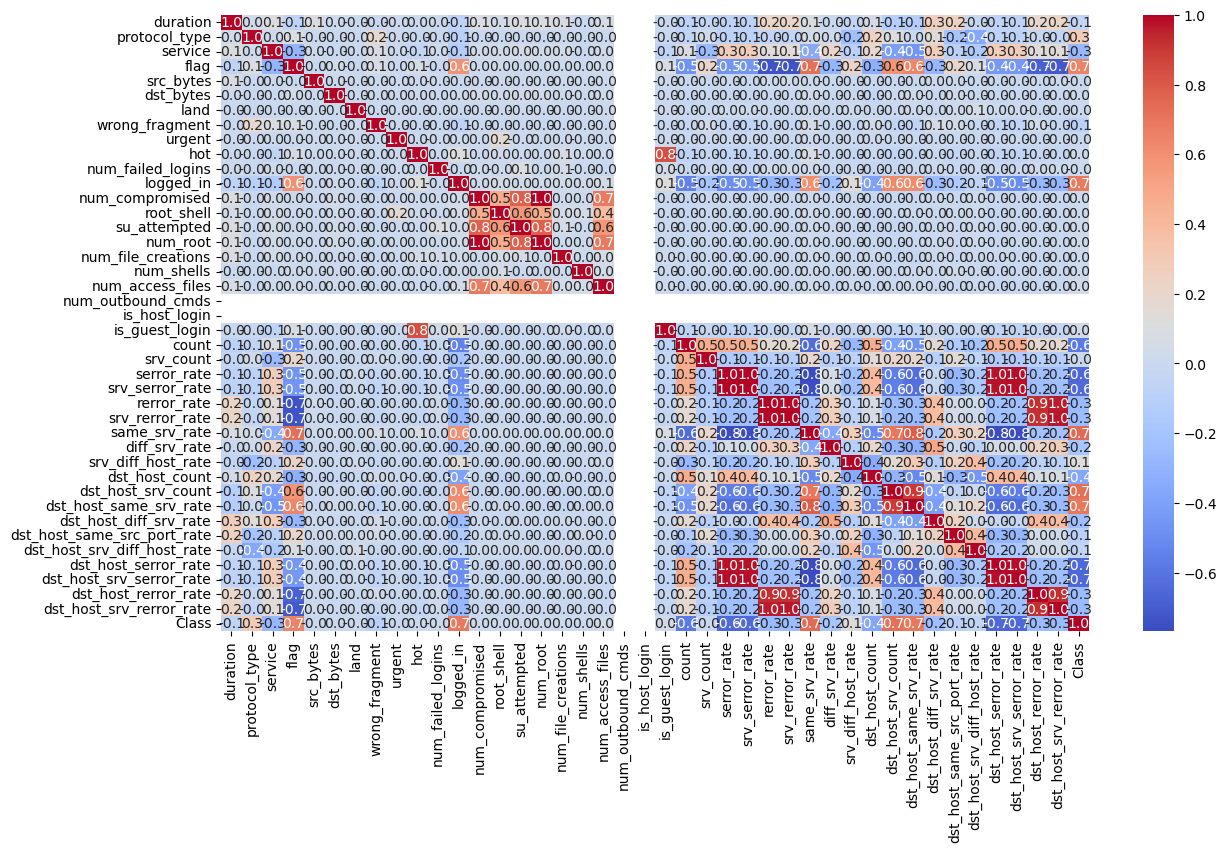

In [57]:
# corrlation
plt.figure(figsize=(14, 8))
sns.heatmap(corr,annot=True,fmt='.1f',cmap='coolwarm')

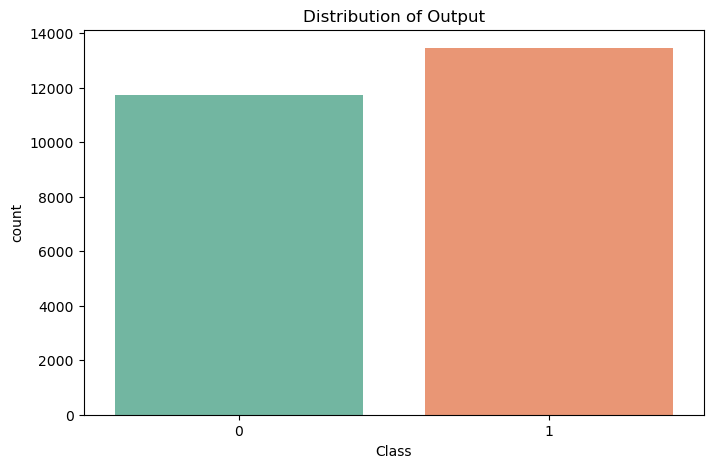

In [59]:
# Visualize the distribution of the target variable 'Grade'
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data,palette='Set2')
plt.title('Distribution of Output')
plt.show()

In [61]:
# split data into feature (x) and label (y)
x=data.drop(['Class'],axis=1)
y=data['Class']

In [63]:
# testing data
x_test=data_test

In [65]:
cols1=x.columns
cols2=x_test.columns

In [67]:
# scaling data
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=Scaler.fit_transform(x)
x_test=Scaler.transform(x_test)

In [69]:
x=pd.DataFrame(x,columns=cols1)

In [71]:
x_test=pd.DataFrame(x_test,columns=cols2)

In [73]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.126061,-0.645384,0.753021,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,2.215916,0.768925,0.753021,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.126061,1.090360,-0.739924,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.126061,-0.452524,0.753021,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.126061,-0.452524,0.753021,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281


In [75]:
x_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.126061,1.026073,-2.232869,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.949554,-1.068731,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
1,-0.113551,-0.126061,1.026073,-2.232869,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.030895,-1.157831,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
2,-0.112806,-0.126061,-0.645384,0.753021,-0.004707,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.490263,-0.262670,0.200940,-0.227251,1.500021,-0.107117,-0.641804,-0.627365,-0.385140,-0.374281
3,-0.113551,-2.468037,-1.031105,0.753021,-0.010084,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.813603,-0.524770,1.069663,-0.440940,2.764775,2.244275,-0.641804,-0.627365,-0.385140,-0.374281
4,-0.113178,-0.126061,1.668941,-1.859633,-0.010093,-0.039141,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.550955,-0.262670,-0.467308,0.467240,-0.380894,-0.107117,-0.641804,-0.627365,2.328492,1.863158


In [79]:
# feature selection
from sklearn.feature_selection import SelectKBest,f_regression
selector=SelectKBest(f_regression,k=25)
x=selector.fit_transform(x,y)
x_test=selector.transform(x_test)

In [85]:
# split data intot X_train to train and test  val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2,shuffle=True, random_state=42)

In [87]:
print("x train shape is : ",X_train.shape)
print("y train shape is : ",y_train.shape)

x train shape is :  (20153, 25)
y train shape is :  (20153,)


In [89]:
print("x test shape is : ",X_val.shape)
print("y test shape is : ",y_val.shape)

x test shape is :  (5039, 25)
y test shape is :  (5039,)


### Build Models

In [93]:
# use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_val)

In [95]:
# preformance
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

cm=confusion_matrix(y_val,y_pred)

print('accuracy score = ',accuracy_score(y_val,y_pred))
print('classification_report = ',classification_report(y_val,y_pred))

accuracy score =  0.9948402460805715
classification_report =                precision    recall  f1-score   support

           0       1.00      0.99      0.99      2365
           1       0.99      1.00      1.00      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



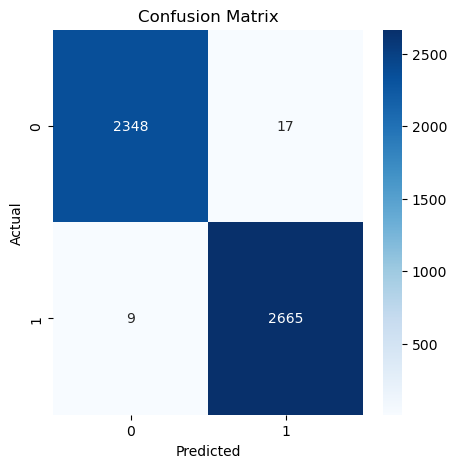

In [97]:
# plot confusion_matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [99]:
# use LogisticRegression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_val)

In [107]:
# preformance
cm_LR=confusion_matrix(y_val,y_pred_LR)
print('accuracy score = ',accuracy_score(y_val,y_pred_LR))
print('classification_report = ',classification_report(y_val,y_pred_LR))

accuracy score =  0.9563405437586823
classification_report =                precision    recall  f1-score   support

           0       0.96      0.95      0.95      2365
           1       0.95      0.97      0.96      2674

    accuracy                           0.96      5039
   macro avg       0.96      0.96      0.96      5039
weighted avg       0.96      0.96      0.96      5039



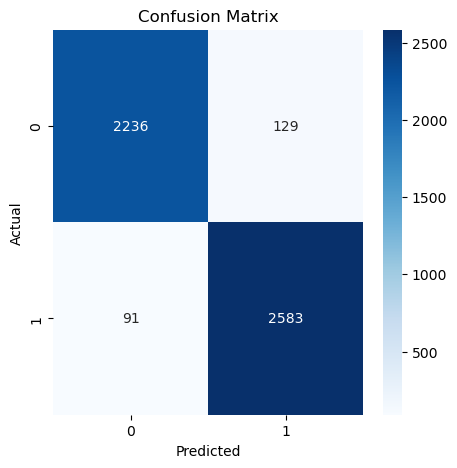

In [109]:
# plot confusion_matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_LR,annot=True,fmt='.0f',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [117]:
#  predict the X_test using the best model and print first ten outputs

y_pred_test = RF.predict(x_test)
print(y_pred_test[:10])

[0 0 1 0 1 1 1 1 1 1]


In [119]:
# add column output in file data_test
data_test['output']=y_pred_test

In [121]:
# save file after edit
data_test.to_csv('Test_data_output.csv',index=False)